# Benchmarking 1d range search

In [1]:
import Task11
import Task12
import Task21
from sanitize_input import Tests
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
log10 = [random.randrange(1, 1000, 1) for n in range(10)]
log100 = [random.randrange(1, 1000, 1) for n in range(100)]
log1_000 = [random.randrange(1, 1000, 1) for n in range(1_000)]
log10_000 = [random.randrange(1, 1000, 1) for n in range(10_000)]
log100_000 = [random.randrange(1, 1000, 1) for n in range(100_000)]
log1_000_000 = [random.randrange(1, 1000, 1) for n in range(1_000_000)]
n_sizes = [log10, log100, log1_000, log10_000, log100_000, log1_000_000] 

In [3]:
lbound, ubound = 250, 600

In [289]:
def naive_bench(elements, lo, hi):
    res = []
    for n in elements:
        b = len(n)
        a = %timeit -o list(Task11.get_range(n, lo, hi))
        res.append((b,a))
    return res

## Naïve

In [290]:
naive_bench(n_sizes, lo, hi)

1.86 µs ± 214 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
8.16 µs ± 402 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
71.1 µs ± 5.98 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
688 µs ± 59.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
7.41 ms ± 855 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
78.7 ms ± 8.76 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


[(10,
  <TimeitResult : 1.86 µs ± 214 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)>),
 (100,
  <TimeitResult : 8.16 µs ± 402 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)>),
 (1000,
  <TimeitResult : 71.1 µs ± 5.98 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)>),
 (10000,
  <TimeitResult : 688 µs ± 59.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)>),
 (100000,
  <TimeitResult : 7.41 ms ± 855 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)>),
 (1000000,
  <TimeitResult : 78.7 ms ± 8.76 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)>)]

Above is the naïve implementation times, as you can see it looks like a constant operation from ten to a million

## Binary search, build + search

In [5]:
def b_search_with_build(elements, lo, hi):
    res = []
    for n in elements:
        b = len(n)
        a = %timeit -o Task12.SortedRangeList(n).get_range(lo, hi)
        res.append((b,a))
    return res

In [114]:
b_search_with_build(n_sizes, lbound, ubound)

5.67 µs ± 11.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
12.5 µs ± 65.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
139 µs ± 12.2 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
1.7 ms ± 49.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
21.7 ms ± 1.62 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
261 ms ± 24 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


[(10,
  <TimeitResult : 5.67 µs ± 11.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)>),
 (100,
  <TimeitResult : 12.5 µs ± 65.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)>),
 (1000,
  <TimeitResult : 139 µs ± 12.2 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)>),
 (10000,
  <TimeitResult : 1.7 ms ± 49.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)>),
 (100000,
  <TimeitResult : 21.7 ms ± 1.62 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)>),
 (1000000,
  <TimeitResult : 261 ms ± 24 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)>)]

## Rangetree, build + search

In [6]:
def tree_search_with_build(elements, lo, hi):
    res = []
    for n in elements:
        b = len(n)
        a = %timeit -o Task21.RangeTree(n).one_d_range_query(lo, hi)
        res.append((b,a))
    return res

In [120]:
tree_search_with_build(n_sizes, lbound, ubound)

28 µs ± 4.92 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
305 µs ± 44 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.82 ms ± 254 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
34 ms ± 3.71 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
369 ms ± 20.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.79 s ± 300 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


[(10,
  <TimeitResult : 28 µs ± 4.92 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)>),
 (100,
  <TimeitResult : 305 µs ± 44 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)>),
 (1000,
  <TimeitResult : 2.82 ms ± 254 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)>),
 (10000,
  <TimeitResult : 34 ms ± 3.71 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)>),
 (100000,
  <TimeitResult : 369 ms ± 20.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)>),
 (1000000,
  <TimeitResult : 3.79 s ± 300 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)>)]

## Time to build RangeTee 

In [7]:
def build_range_tree(elements, *_):
    res = []
    for n in elements:
        b = len(n)
        a = %timeit -o Task21.RangeTree(n)
        res.append((b,a))
    return res

In [136]:
build_range_tree(n_sizes, lbound, ubound)

20 µs ± 2.13 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
224 µs ± 29.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.63 ms ± 591 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
45.1 ms ± 20 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
390 ms ± 38.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.03 s ± 180 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


[(10,
  <TimeitResult : 20 µs ± 2.13 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)>),
 (100,
  <TimeitResult : 224 µs ± 29.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)>),
 (1000,
  <TimeitResult : 2.63 ms ± 591 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)>),
 (10000,
  <TimeitResult : 45.1 ms ± 20 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)>),
 (100000,
  <TimeitResult : 390 ms ± 38.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)>),
 (1000000,
  <TimeitResult : 3.03 s ± 180 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)>)]

## Time to build sorted range list (i.e. timsort)

In [8]:
def build_sorted_list(elements, *_):
    res = []
    for n in elements:
        b = len(n)
        a = %timeit -o Task12.SortedRangeList(n)
        res.append((b,a))
    return res

In [134]:
build_sorted_list(n_sizes, lbound, ubound)

1.23 µs ± 28.1 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
7.55 µs ± 740 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
118 µs ± 10.2 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
1.83 ms ± 356 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
23.2 ms ± 2.92 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
261 ms ± 24.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


[(10,
  <TimeitResult : 1.23 µs ± 28.1 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)>),
 (100,
  <TimeitResult : 7.55 µs ± 740 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)>),
 (1000,
  <TimeitResult : 118 µs ± 10.2 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)>),
 (10000,
  <TimeitResult : 1.83 ms ± 356 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)>),
 (100000,
  <TimeitResult : 23.2 ms ± 2.92 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)>),
 (1000000,
  <TimeitResult : 261 ms ± 24.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)>)]

## Rangtree pre built tree search

In [296]:
def tree_search_only(elements, lo, hi):
    objs = (Task21.RangeTree(e) for e in elements)
    res = []
    for i, n in enumerate(objs):
        b = 10**(i+1)
        a = %timeit -o n.one_d_range_query(lo, hi)
        res.append((b,a))
    return res

In [130]:
tree_search_only(n_sizes, lbound, ubound)

4.97 µs ± 287 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
48.2 µs ± 2.12 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
585 µs ± 106 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
5.35 ms ± 1.66 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
44.6 ms ± 3.58 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
457 ms ± 40.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


[(1,
  <TimeitResult : 4.97 µs ± 287 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)>),
 (2,
  <TimeitResult : 48.2 µs ± 2.12 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)>),
 (3,
  <TimeitResult : 585 µs ± 106 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)>),
 (4,
  <TimeitResult : 5.35 ms ± 1.66 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)>),
 (5,
  <TimeitResult : 44.6 ms ± 3.58 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)>),
 (6,
  <TimeitResult : 457 ms ± 40.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)>)]

## Binary search, presorted search

In [297]:
def b_search_only(elements, lo, hi):
    objs = (Task12.SortedRangeList(e) for e in elements)
    res = []
    for i, n in enumerate(objs):
        b = 10**(i+1)
        a = %timeit -o n.get_range(lbound, ubound)
        res.append((b,a))
    return res

In [194]:
b_search_only(n_sizes, lbound, ubound)

4.33 µs ± 103 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
6.73 µs ± 413 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
11.3 µs ± 363 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
33.4 µs ± 3.24 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
296 µs ± 48.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
14.3 ms ± 401 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


[(10,
  '4.33 µs ± 103 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)'),
 (100,
  '6.73 µs ± 413 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)'),
 (1000,
  '11.3 µs ± 363 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)'),
 (10000,
  '33.4 µs ± 3.24 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)'),
 (100000,
  '296 µs ± 48.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)'),
 (1000000,
  '14.3 ms ± 401 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)')]

In [291]:
def print_thing(r):
    return [(i, m.average, m.stdev) for i, m in r]

In [292]:
def try_bounds(es, l, u):
    funcs = [naive_bench, b_search_with_build, tree_search_with_build,
             build_range_tree, build_sorted_list, tree_search_only,
             b_search_only]
    return [(r.__name__, print_thing(r(es, l, u))) for r in funcs]

In [298]:
dis = try_bounds(n_sizes, 250, 600)

1.78 µs ± 171 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
10 µs ± 953 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
91.3 µs ± 3.86 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
1.09 ms ± 261 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
9.71 ms ± 533 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
96.5 ms ± 7.63 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
5.84 µs ± 518 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
13.6 µs ± 613 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
134 µs ± 5.9 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
1.58 ms ± 49.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
21.2 ms ± 2.12 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
271 ms ± 24.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
25.4 µs ± 3.38 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
298 µs ± 41.9 µs per loop (mean ± std. dev. of 7 runs, 1000 

In [299]:
dis

[('naive_bench',
  [(10, 1.7798587842740483e-06, 1.7108047403252481e-07),
   (100, 9.995778061420424e-06, 9.526263795376915e-07),
   (1000, 9.134508938586805e-05, 3.856228358667777e-06),
   (10000, 0.001090744522849231, 0.000261187143820951),
   (100000, 0.009706109454294036, 0.0005331442958789358),
   (1000000, 0.09651013637163228, 0.007625692738159397)]),
 ('b_search_with_build',
  [(10, 5.841283141437868e-06, 5.1826064560528e-07),
   (100, 1.3554745098569713e-05, 6.12542412405346e-07),
   (1000, 0.00013405363702851381, 5.895418811610626e-06),
   (10000, 0.0015821273601406055, 4.92319251195153e-05),
   (100000, 0.021203791804281145, 0.002117211280815397),
   (1000000, 0.27112553585694904, 0.024770253749909522)]),
 ('tree_search_with_build',
  [(10, 2.5437025114349254e-05, 3.375107135435619e-06),
   (100, 0.00029840721300154527, 4.18877282296718e-05),
   (1000, 0.0027287864356912903, 0.0003003139774463512),
   (10000, 0.03346362878572628, 0.004960123293754702),
   (100000, 0.350817456

In [30]:


with open('results.txt', 'w') as f:
    af = '\n'.join(str(e) for e in dis)
    f.write(af)

In [13]:
try_bounds(n_sizes, 0, 100)

2.9 µs ± 350 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
20.3 µs ± 662 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
115 µs ± 4.72 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
1.29 ms ± 142 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
11.7 ms ± 385 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
116 ms ± 4.65 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


[('tree_search_only',
  [(2.8999601542857176e-06, 3.504071019637747e-07),
   (2.0304450602857145e-05, 6.621625504465378e-07),
   (0.00011460161005714287, 4.724764746281523e-06),
   (0.0012919777634285694, 0.00014196427610555076),
   (0.011654931861428578, 0.00038455266442477743),
   (0.11613322537142838, 0.0046533986553303755)])]

In [211]:
m

<TimeitResult : 21.5 µs ± 6.06 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)>

In [212]:
m.all_runs

[0.36303861900069023,
 0.1910119290005241,
 0.1941487620006228,
 0.18847332099994674,
 0.1899927980002758,
 0.18836639300025126,
 0.18761721099963324]

In [216]:
m.average * m.loops

0.2146641475717063

In [218]:
sum(m.all_runs)/len(m.all_runs)

0.21466414757170632

In [237]:
log10

[623, 661, 691, 116, 333, 366, 631, 423, 712, 764]

## plot plan
Plan is probably to display the data from a np dataframe to matplotlib. The plot will probably be line graphs with ranges such as: precise (within 20%), with all on 1 side of median and not, broad (80%), middle (50%) and 1 element query. 

In [ ]:
%matplotlib inline

In [308]:
# naive_bench, b_search_with_build, tree_search_with_build, build_range_tree, build_sorted_list, tree_search_only, b_search_only
names = ["Bruteforce", "Binary search + build", "Tree search + build", "Build Tree", "Sort Array", "Tree search", "Binary search"]

[1.77985878e-06 9.99577806e-06 9.13450894e-05 1.09074452e-03
 9.70610945e-03 9.65101364e-02] woot [1.71080474e-07 9.52626380e-07 3.85622836e-06 2.61187144e-04
 5.33144296e-04 7.62569274e-03]
[5.84128314e-06 1.35547451e-05 1.34053637e-04 1.58212736e-03
 2.12037918e-02 2.71125536e-01] woot [5.18260646e-07 6.12542412e-07 5.89541881e-06 4.92319251e-05
 2.11721128e-03 2.47702537e-02]
[2.54370251e-05 2.98407213e-04 2.72878644e-03 3.34636288e-02
 3.50817456e-01 3.58954636e+00] woot [3.37510714e-06 4.18877282e-05 3.00313977e-04 4.96012329e-03
 3.41513559e-02 5.79374165e-02]
[2.96849115e-05 3.11949988e-04 2.28774822e-03 2.89367009e-02
 3.16559453e-01 3.40490028e+00] woot [1.15511982e-05 1.15662592e-04 9.25916152e-05 2.44219130e-03
 1.55062655e-02 4.73697543e-01]
[1.36528883e-06 5.97000480e-06 1.17367582e-04 1.62604915e-03
 1.96641685e-02 3.09896308e-01] woot [1.85931403e-07 2.96755402e-07 4.70259365e-06 7.84162284e-05
 7.41895188e-04 6.36253052e-02]
[4.86179063e-06 4.57411629e-05 4.38633818e-04

Text(0.5, 1.0, 'Time taken for a single 1d range search')

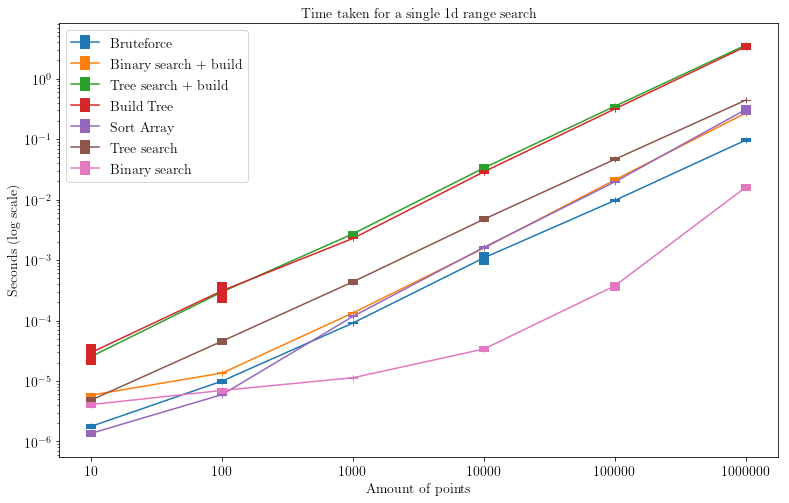

In [309]:
fig, ax = plt.subplots()
le = len(n_sizes)
for p,i in enumerate(dis):
#    b = np.array([e[0] for e in i[1]])
#    fig = plt.bar([10**i for i in range(1,6)], b)
#    plt.plot(b)
    a = [str(10**i) for i in range(1,7)]
#    a = np.arange(p, le**2+p, len(dis))
    plt.yscale('log')
    err = np.array([e[2] for e in i[1]])
    v = np.array([e[1] for e in i[1]])
    print(v,'woot', err)
    ax.errorbar(a, v, err, fmt='-|', elinewidth=10, barsabove=1, label=names[p])
    ax.legend()
#    plt.legend()
#    a = np.array([e[1] for e in i[1]])
#    plt.errorbar(b,a)
#    plt.errorbar(x, y, xerr=asymmetric_error, fmt='o')
ax.set_xlabel("Amount of points")
ax.set_ylabel("Seconds (log scale)")
ax.set_title("Time taken for a single 1d range search")
#plt.axis([10, int(1e6), 0, 4])

In [310]:
#plt.tight_layout()
#format_axes(ax)
fig.savefig("250-600_plot.png")

In [181]:
dis[0][1]

[(1.0540555228577172e-06, 3.9985999144381774e-07),
 (8.583835408572408e-07, 6.095037198397183e-08),
 (8.604751715715143e-07, 1.6855399481108555e-07),
 (8.416658744285997e-07, 9.252991402602635e-08),
 (8.275391888571123e-07, 8.38129942548391e-08),
 (7.979017315713983e-07, 6.594840491951316e-08)]

In [229]:
#import pandas as pd
import matplotlib
from math import sqrt
SPINE_COLOR = 'gray'

In [281]:
def latexify(fig_width=None, fig_height=None, columns=1):
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.

    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples

    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1,2])

    if fig_width is None:
        fig_width = 3.39 if columns==1 else 6.9 # width in inches

    if fig_height is None:
        golden_mean = (sqrt(5)-1.0)/2.0    # Aesthetic ratio
        fig_height = fig_width*golden_mean # height in inches

    MAX_HEIGHT_INCHES = 8.0
    if fig_height > MAX_HEIGHT_INCHES:
        print("WARNING: fig_height too large:" + fig_height + 
              "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
        fig_height = MAX_HEIGHT_INCHES

    params = {'backend': 'ps',
              'text.latex.preamble': ['\\usepackage{gensymb}'],
              'axes.labelsize': 14, # fontsize for x and y labels (was 10)
              'axes.titlesize': 14,
#              'text.fontsize': 10, # was 10
              'legend.fontsize': 14, # was 10
              'xtick.labelsize': 14,
              'ytick.labelsize': 14,
              'text.usetex': True,
              'figure.figsize': [fig_width,fig_height],
              'font.family': 'serif'
    }

    matplotlib.rcParams.update(params)


def format_axes(ax):

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color(SPINE_COLOR)
        ax.spines[spine].set_linewidth(0.5)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_tick_params(direction='out', color=SPINE_COLOR)

    return ax

In [282]:
width = 12.9
format_axes(ax)
latexify(width, width*(sqrt(5)-1.0)/2.0 )